In [11]:
# import
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import csv

In [12]:
with open('data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('data/drugbank.sdf')
drugbank = [m for m in suppl if m]

[12:26:37] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:26:37] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:26:38] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:26:38] ERROR: Could not sanitize molecule ending on line 250947
[12:26:38] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:26:38] Explicit valence for atom # 17 O, 3, is greater than permitted
[12:26:38] ERROR: Could not sanitize molecule ending on line 258130
[12:26:38] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[12:26:38] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:26:38] ERROR: Could not sanitize molecule ending on line 261581
[12:26:38] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:26:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[12:26:38] ERROR: Could not 

In [48]:
# get organic drugbank
has_C = Chem.MolFromSmarts("[#6]")
org_drugbank = [drug for drug in drugbank if drug.HasSubstructMatch(has_C)]

In [49]:
drugb_fps = [Chem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in drugbank]
org_drugb_fps = [Chem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in org_drugbank]
mtor_fps = [Chem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in mtor]

In [16]:
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin_fp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, 1024)

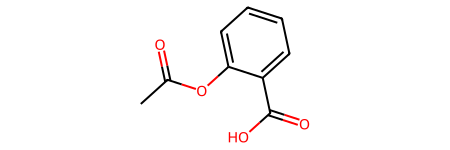

In [17]:
aspirin


In [19]:
aspirin_fp.ToBitString()

'000000000001000000000001000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000001001000000000000000000000000000000000100000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000100000000000000000000100000000000000000000000010000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000100000000000000000000000000000000000000000001000000000000000100000000000000000000000000000000000010000000000000000000010000000000000000000000000000000

In [20]:
from rdkit import DataStructs

In [21]:
DataStructs.TanimotoSimilarity(aspirin_fp, drugb_fps[0])

0.12389380530973451

In [24]:
[(i, DataStructs.TanimotoSimilarity(aspirin_fp, fp)) for i, fp in enumerate(drugb_fps) if DataStructs.TanimotoSimilarity(aspirin_fp, fp) > 0.5]


[(826, 1.0),
 (1215, 0.6129032258064516),
 (2426, 0.52),
 (6636, 0.5277777777777778)]

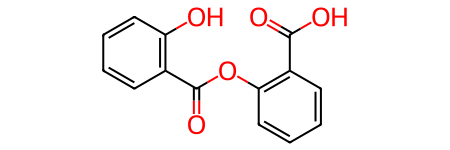

In [25]:
drugbank[1215]

In [28]:
dists = [[(i, DataStructs.TanimotoSimilarity(mtor_fp, fp)) for i, fp in enumerate(drugb_fps) if DataStructs.TanimotoSimilarity(mtor_fp, fp) > 0.5] for mtor_fp in mtor_fps]

In [29]:
dists

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(71, 0.5194805194805194),
  (743, 0.5714285714285714),
  (778, 0.5633802816901409),
  (1099, 1.0),
  (1134, 0.7313432835820896),
  (1224, 0.5853658536585366)],
 [(2344, 0.6666666666666666)],
 [],
 [],
 [],
 [],
 [(760, 0.8715596330275229), (1377, 0.8596491228070176), (4580, 1.0)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(5903, 1.0), (5904, 0.5245901639344263)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(760, 0.8636363636363636),
  (1377, 0.8050847457627118),
  (4580, 0.7916666666666666)],
 [],
 [],
 [],
 [(5214, 0.5925925925925926)],
 [(5903, 0.5689655172413793), (5904, 0.6296296296296297)],
 [],
 [],
 [(5904, 0.532258064516129)],
 [(5214, 0.6862745098039216), (5905, 0.5517241379310345)],
 [(6143, 0.5686274509803921)],
 [

In [34]:
sorted([(i, len(s)) for i,s in enumerate(dists)], key = lambda x: x[1], reverse = True)

[(17, 6),
 (1218, 5),
 (339, 4),
 (1274, 4),
 (2807, 4),
 (23, 3),
 (77, 3),
 (90, 3),
 (145, 3),
 (176, 3),
 (177, 3),
 (184, 3),
 (195, 3),
 (202, 3),
 (205, 3),
 (213, 3),
 (214, 3),
 (218, 3),
 (220, 3),
 (231, 3),
 (317, 3),
 (322, 3),
 (328, 3),
 (331, 3),
 (340, 3),
 (373, 3),
 (379, 3),
 (418, 3),
 (517, 3),
 (551, 3),
 (938, 3),
 (1002, 3),
 (1057, 3),
 (1067, 3),
 (1090, 3),
 (1095, 3),
 (1127, 3),
 (1172, 3),
 (1179, 3),
 (1322, 3),
 (1403, 3),
 (1406, 3),
 (1416, 3),
 (1520, 3),
 (1542, 3),
 (1550, 3),
 (1783, 3),
 (1818, 3),
 (2024, 3),
 (3047, 3),
 (36, 2),
 (82, 2),
 (86, 2),
 (113, 2),
 (114, 2),
 (115, 2),
 (136, 2),
 (138, 2),
 (139, 2),
 (140, 2),
 (141, 2),
 (142, 2),
 (149, 2),
 (174, 2),
 (175, 2),
 (194, 2),
 (198, 2),
 (203, 2),
 (206, 2),
 (208, 2),
 (209, 2),
 (211, 2),
 (215, 2),
 (219, 2),
 (221, 2),
 (233, 2),
 (303, 2),
 (318, 2),
 (321, 2),
 (323, 2),
 (329, 2),
 (330, 2),
 (334, 2),
 (335, 2),
 (349, 2),
 (352, 2),
 (353, 2),
 (421, 2),
 (422, 2),
 (463,

In [47]:
print(len(drugbank), len(org_drugbank))

7120 7041


In [35]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [50]:
picker = MaxMinPicker()

def dist_fun(idx1, idx2):
    return 1 - DataStructs.TanimotoSimilarity(org_drugb_fps[idx1], org_drugb_fps[idx2])

picked = list(picker.LazyPick(dist_fun, len(org_drugbank), 50))

In [51]:
picked

[6635,
 475,
 1828,
 2674,
 4635,
 6926,
 3831,
 3380,
 319,
 1467,
 2310,
 1775,
 4163,
 1649,
 439,
 4577,
 3492,
 2561,
 5631,
 2795,
 2337,
 682,
 2716,
 3731,
 3856,
 4133,
 4542,
 6408,
 3122,
 1472,
 5832,
 2897,
 2005,
 4958,
 6493,
 1807,
 2413,
 3703,
 3850,
 1344,
 80,
 1450,
 3496,
 6198,
 1155,
 568,
 477,
 414,
 2233,
 2505]

In [42]:
from rdkit.Chem import Draw

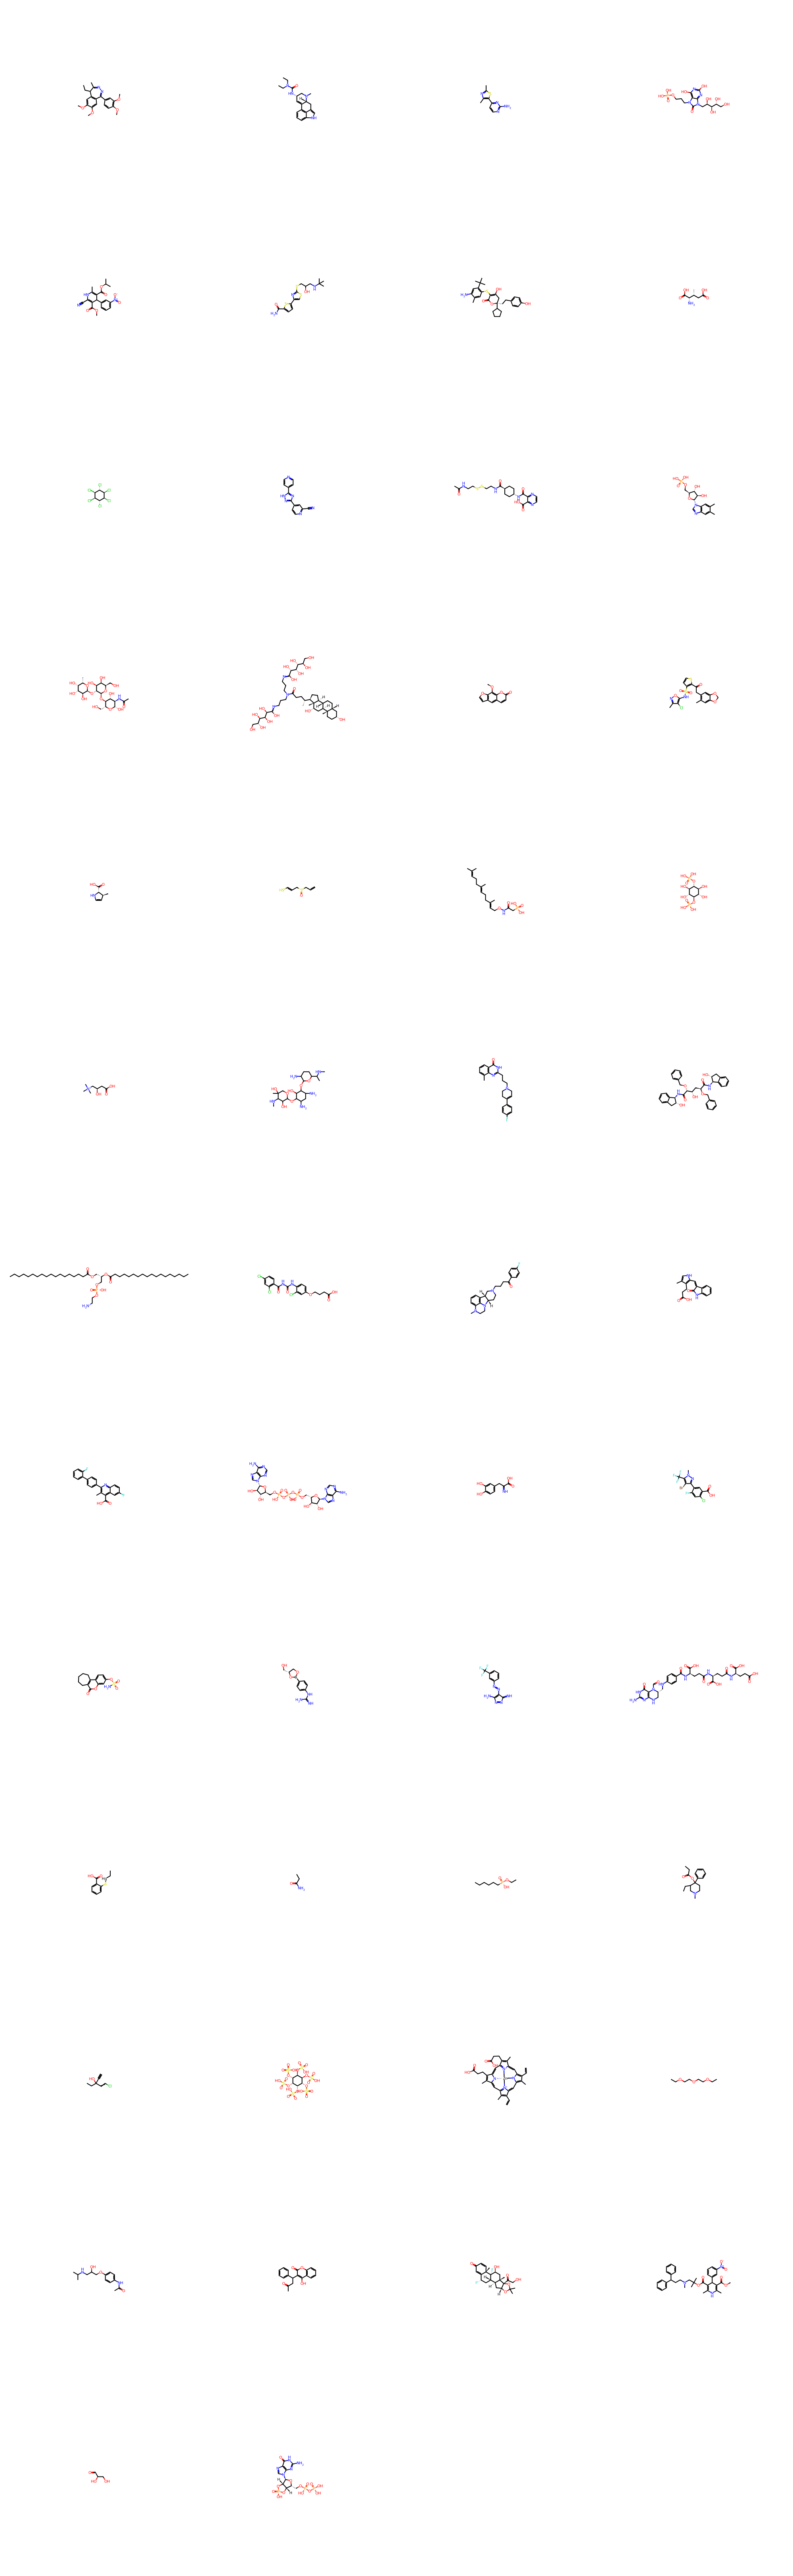

In [53]:
Draw.MolsToGridImage([drugbank[i] for i in picked], molsPerRow = 4, subImgSize=(500,500))